<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>CPE378 Machine Learning</center>
# <center>Lecture 03 - Training Models</center>
---

# 1. Direct approach

## -Pseudoinverse

In [2]:
import numpy as np

In [3]:
A = np.array([[1,2,1],
              [2,1,1],
              [3,2,1],
              [1,1,1]])
print(A)

[[1 2 1]
 [2 1 1]
 [3 2 1]
 [1 1 1]]


In [4]:
B = np.array([12,9,19,8])
B.shape = (-1,1) # ให้เป็นแนวตั้ง
print(B)

[[12]
 [ 9]
 [19]
 [ 8]]


### วิธีแก้แบบคูณ

In [5]:
np.matmul(np.linalg.pinv(A),B)

# matmul = คูณ
# linalg = linear algebra
# pinv = p inverse

array([[ 3. ],
       [ 5.5],
       [-1.5]])

### วิธีแก้แบบใช้ sklearn

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(A,B)

LinearRegression()

In [7]:
model.coef_

array([[3. , 5.5, 0. ]])

In [8]:
model.intercept_

array([-1.5])

    จะเห็นว่าทั้ง วิธีแก้แบบคูณ และวิธีแก้แบบใช้ sklearn จะได้คำตอบที่เหมือนกัน

# 2. Iterative approach

## -Gradient descent

In [9]:
import matplotlib.pyplot as plt

In [10]:
x = np.random.rand(100)
x

array([0.1125646 , 0.89265141, 0.18376217, 0.1561052 , 0.78739522,
       0.83516631, 0.40398828, 0.2835305 , 0.72173133, 0.74231987,
       0.84896079, 0.33487669, 0.20607102, 0.04853792, 0.67073455,
       0.84070894, 0.85149773, 0.44424215, 0.98914525, 0.23790981,
       0.33789305, 0.5228966 , 0.63056806, 0.96174029, 0.59739756,
       0.02969237, 0.70142242, 0.62106322, 0.36282644, 0.43410346,
       0.37088662, 0.11543539, 0.22142374, 0.33638464, 0.0887093 ,
       0.98594936, 0.56181843, 0.829843  , 0.80330592, 0.3131929 ,
       0.71559934, 0.66695017, 0.95690449, 0.17060261, 0.38915014,
       0.5747164 , 0.87122978, 0.95202389, 0.85943689, 0.9741866 ,
       0.68397599, 0.52729954, 0.50681719, 0.21265291, 0.65544954,
       0.77104969, 0.21419792, 0.14599555, 0.55384277, 0.95282409,
       0.14216768, 0.41727069, 0.36502703, 0.41694704, 0.05690265,
       0.72738409, 0.86049168, 0.74782516, 0.30722724, 0.33196443,
       0.3371868 , 0.63720857, 0.33075503, 0.50328229, 0.03785

In [11]:
y = 5*np.exp(-5*x)
y

array([2.84799409, 0.05762383, 1.99496615, 2.29082477, 0.09753556,
       0.07681206, 0.66331619, 1.21141051, 0.13544105, 0.12219203,
       0.07169272, 0.93711849, 1.78440107, 3.9225749 , 0.17477867,
       0.07471258, 0.07078906, 0.54238846, 0.03556873, 1.52179238,
       0.92309112, 0.36602812, 0.21365293, 0.04079223, 0.2521957 ,
       4.31016447, 0.1499169 , 0.22405176, 0.81489641, 0.57059285,
       0.7827083 , 2.80740617, 1.65254947, 0.93007945, 3.208782  ,
       0.03614167, 0.30129837, 0.07888398, 0.09007689, 1.04443221,
       0.13965799, 0.17811731, 0.04179057, 2.13064521, 0.7143996 ,
       0.28248097, 0.06413847, 0.04282293, 0.06803408, 0.03833105,
       0.16358182, 0.35805817, 0.396671  , 1.72663314, 0.18865982,
       0.10584172, 1.71334624, 2.4095985 , 0.31355643, 0.04265194,
       2.45616091, 0.62069494, 0.8059793 , 0.62170021, 3.76190192,
       0.13166657, 0.06767622, 0.11887439, 1.07605513, 0.95086398,
       0.92635656, 0.20667558, 0.95663128, 0.4037443 , 4.13776

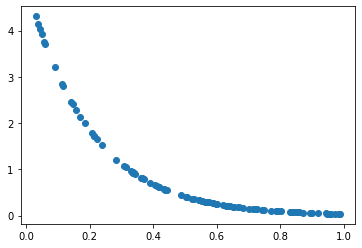

In [12]:
plt.plot(x,y,'o')

In [27]:
c0 = np.random.randn()*10
c1 = np.random.randn()*10
# step ในที่นี้คือ Learning Rate
step = 0.001  # 0.001 = คล้าย ๆ การเดินทีละก้าวนิด ๆ 

for i in range(1000):  # แต่เดินเยอะ ๆ 
    S = np.sum((y-c0*np.exp(c1*x))**2)
    c0_grad = -2*np.sum((y-c0*np.exp(c1*x))*np.exp(c1*x))
    c1_grad = -2*np.sum((y-c0*np.exp(c1*x))*c0*x*np.exp(c1*x))
    c0 = c0 - step*c0_grad
    c1 = c1 - step*c1_grad

    print("Iteration %d: Error = %f, Grad_c0 = %f, Grad_c1 = %f"%(i,S,c0_grad,c1_grad))

Iteration 0: Error = 41.005930, Grad_c0 = -36.324927, Grad_c1 = -10.303272
Iteration 1: Error = 39.591543, Grad_c0 = -35.718324, Grad_c1 = -10.250589
Iteration 2: Error = 38.221677, Grad_c0 = -35.118219, Grad_c1 = -10.190561
Iteration 3: Error = 36.895289, Grad_c0 = -34.524600, Grad_c1 = -10.123426
Iteration 4: Error = 35.611351, Grad_c0 = -33.937459, Grad_c1 = -10.049424
Iteration 5: Error = 34.368851, Grad_c0 = -33.356791, Grad_c1 = -9.968797
Iteration 6: Error = 33.166794, Grad_c0 = -32.782596, Grad_c1 = -9.881784
Iteration 7: Error = 32.004197, Grad_c0 = -32.214877, Grad_c1 = -9.788628
Iteration 8: Error = 30.880091, Grad_c0 = -31.653638, Grad_c1 = -9.689570
Iteration 9: Error = 29.793524, Grad_c0 = -31.098889, Grad_c1 = -9.584852
Iteration 10: Error = 28.743553, Grad_c0 = -30.550639, Grad_c1 = -9.474717
Iteration 11: Error = 27.729250, Grad_c0 = -30.008901, Grad_c1 = -9.359409
Iteration 12: Error = 26.749698, Grad_c0 = -29.473688, Grad_c1 = -9.239168
Iteration 13: Error = 25.80399

In [28]:
c0, c1

(4.957892192113767, -4.943268617361192)

    จะเห็นว่าเมื่อวนลูปไปเรื่อย ๆ ค่า Error ก็จะมีค่าที่ลดลงเรื่อย ๆ เช่นกัน

## -Stochastic gradient descent

In [35]:
sample_index = np.random.randint(0, high = len(x), size = np.int(len(x)*0.1))
sample_index

<ipython-input-35-a0f0d198d199>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_index = np.random.randint(0, high = len(x), size = np.int(len(x)*0.1))


array([70, 80, 83, 81, 87, 80, 27, 41, 76, 70])

In [40]:
c0 = np.random.randn()*10
c1 = np.random.randn()*10
step = 0.01 

for i in range(1000):
    S = np.sum((y-c0*np.exp(c1*x))**2)
    sample_index = np.random.randint(0, high = len(x), size = np.int(len(x)*0.1))
    x_samp = x[sample_index]
    y_samp = y[sample_index]
    c0_grad = -2*np.sum((y_samp-c0*np.exp(c1*x_samp))*np.exp(c1*x_samp))
    c1_grad = -2*np.sum((y_samp-c0*np.exp(c1*x_samp))*c0*x_samp*np.exp(c1*x_samp))
    c0 = c0 - step*c0_grad
    c1 = c1 - step*c1_grad

    print("Iteration %d: Error = %f, Grad_c0 = %f, Grad_c1 = %f"%(i,S,c0_grad,c1_grad))

<ipython-input-40-d4e9b34598b9>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_index = np.random.randint(0, high = len(x), size = np.int(len(x)*0.1))


Iteration 0: Error = 23.915511, Grad_c0 = 7.611162, Grad_c1 = 3.423530
Iteration 1: Error = 21.620668, Grad_c0 = 3.142694, Grad_c1 = 1.887625
Iteration 2: Error = 20.652603, Grad_c0 = 2.753513, Grad_c1 = 1.240278
Iteration 3: Error = 19.883156, Grad_c0 = 2.888541, Grad_c1 = 1.588700
Iteration 4: Error = 19.060581, Grad_c0 = 1.191232, Grad_c1 = 1.223601
Iteration 5: Error = 18.658943, Grad_c0 = 1.475333, Grad_c1 = 1.150359
Iteration 6: Error = 18.214229, Grad_c0 = 2.153964, Grad_c1 = 1.267750
Iteration 7: Error = 17.626421, Grad_c0 = 2.559985, Grad_c1 = 0.851950
Iteration 8: Error = 17.017616, Grad_c0 = 5.854759, Grad_c1 = 2.076119
Iteration 9: Error = 15.662791, Grad_c0 = 0.006582, Grad_c1 = 0.007209
Iteration 10: Error = 15.660811, Grad_c0 = 0.541339, Grad_c1 = 0.777980
Iteration 11: Error = 15.480042, Grad_c0 = 1.180390, Grad_c1 = 1.135772
Iteration 12: Error = 15.147373, Grad_c0 = 1.248130, Grad_c1 = 1.097838
Iteration 13: Error = 14.811902, Grad_c0 = 0.038709, Grad_c1 = 0.081621
It

Iteration 938: Error = 0.040075, Grad_c0 = -0.030832, Grad_c1 = -0.069479
Iteration 939: Error = 0.039948, Grad_c0 = -0.023882, Grad_c1 = -0.050024
Iteration 940: Error = 0.039868, Grad_c0 = -0.004120, Grad_c1 = -0.014033
Iteration 941: Error = 0.039837, Grad_c0 = -0.014571, Grad_c1 = -0.026662
Iteration 942: Error = 0.039804, Grad_c0 = -0.048269, Grad_c1 = -0.078213
Iteration 943: Error = 0.039736, Grad_c0 = 0.067305, Grad_c1 = -0.022394
Iteration 944: Error = 0.039415, Grad_c0 = 0.058302, Grad_c1 = -0.028490
Iteration 945: Error = 0.039112, Grad_c0 = 0.059915, Grad_c1 = 0.000366
Iteration 946: Error = 0.038898, Grad_c0 = -0.012944, Grad_c1 = -0.035902
Iteration 947: Error = 0.038830, Grad_c0 = 0.078463, Grad_c1 = -0.006516
Iteration 948: Error = 0.038531, Grad_c0 = -0.007838, Grad_c1 = -0.041302
Iteration 949: Error = 0.038426, Grad_c0 = -0.004678, Grad_c1 = -0.031627
Iteration 950: Error = 0.038343, Grad_c0 = 0.072629, Grad_c1 = -0.001815
Iteration 951: Error = 0.038081, Grad_c0 = -

In [41]:
c0, c1

(5.084609698297758, -5.11257527915078)

    จะเห็นว่าเมื่อวนลูปไปเรื่อย ๆ ค่า Error ก็จะมีค่าที่ลดลงเรื่อย ๆ เช่นกัน

---